<a href="https://colab.research.google.com/github/Gin-Arata/PCVK_13_Gaco-Razan-Kamil/blob/main/Week10_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Import drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Install pytesseract

!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,626 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
# @title Import library

import cv2 as cv
import numpy as np
import pytesseract as pyt
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

Text(0.5, 1.0, 'Original Image')

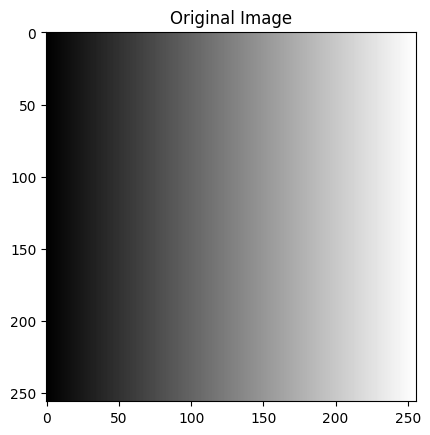

In [ ]:
# @title Membuat gambar gradasi dari hitam ke putih dengan 8-bit warna

# Untuk membuat gradient warna dari 0 hingga 255
img_gradient = np.linspace(0, 255, 256, dtype=np.uint8)
img_gradient = np.tile(img_gradient, (256, 1))

plt.imshow(img_gradient, cmap='gray')
plt.title('Original Image')

In [ ]:
# @title Membuat function global threshold

# Func untuk Binary Threshold
def binary_threshold(img, threshold):
    img_binary = np.zeros_like(img)
    img_binary[img >= threshold] = 255
    return img_binary

# Func untuk Binary Inverse Threshold
def binary_inv_threshold(img, threshold):
    img_binary_inv = np.zeros_like(img)
    img_binary_inv[img < threshold] = 255
    return img_binary_inv

# Func untuk Truncate Threshold
def trunc_threshold(img, threshold):
    img_trunc = np.copy(img)
    img_trunc[img > threshold] = threshold
    return img_trunc

# Func untuk To Zero Threshold
def tozero_threshold(img, threshold):
    img_tozero = np.zeros_like(img)
    img_tozero[img >= threshold] = img[img >= threshold]
    return img_tozero

# Func untuk To Zero Inverse Threshold
def tozero_inv_threshold(img, threshold):
    img_tozero_inv = np.zeros_like(img)
    img_tozero_inv[img < threshold] = img[img < threshold]
    return img_tozero_inv

In [ ]:
# @title Melakukan global threshold

threshold = 170

# binary threshold
img_binary = binary_threshold(img_gradient, threshold)

# binary inv threshold
img_binary_inv = binary_inv_threshold(img_gradient, threshold)

# binary trunc
img_trunc = trunc_threshold(img_gradient, threshold)

# binary tozero
img_tozero = tozero_threshold(img_gradient, threshold)

# binary tozero inv
img_tozero_inv = tozero_inv_threshold(img_gradient, threshold)

Text(0.5, 1.0, 'Tozero Inv Threshold')

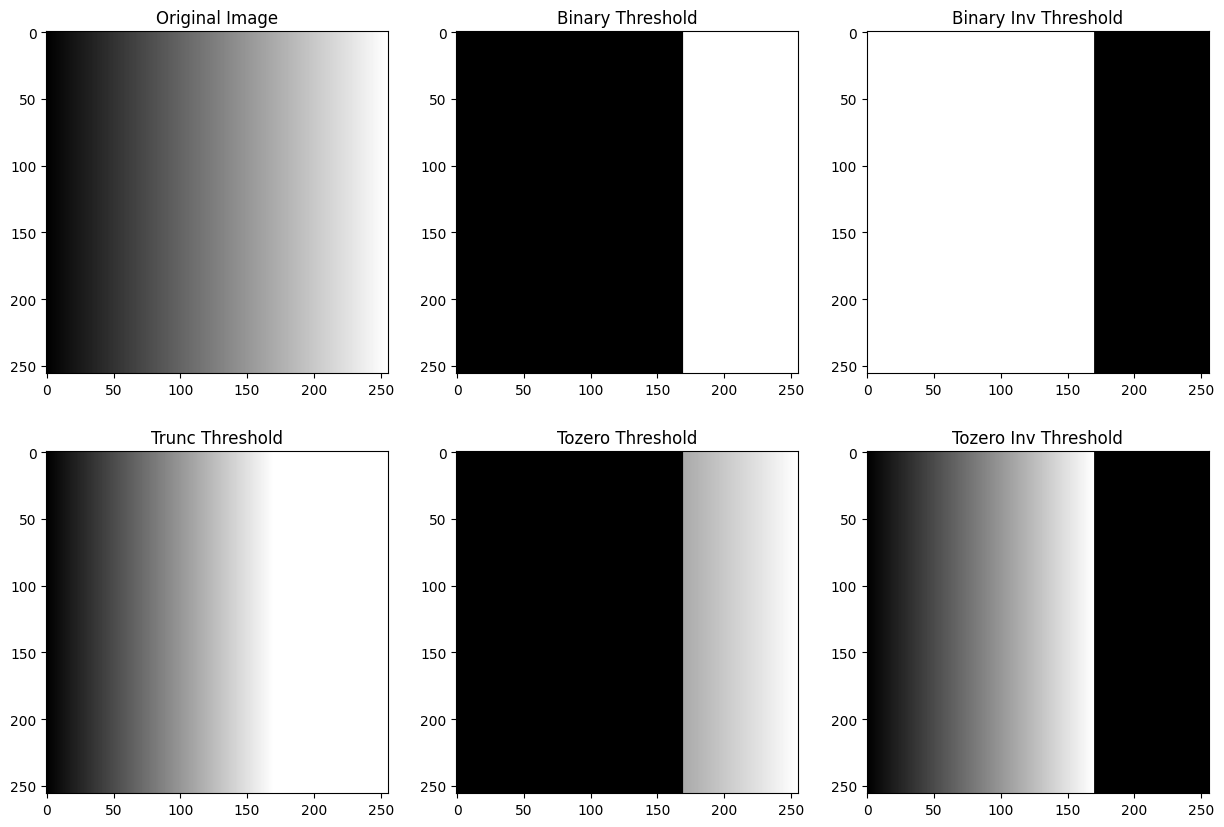

In [ ]:
# @title Menampilkan hasil global threshold pada gambar gradient

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].imshow(img_gradient, cmap='gray')
ax[0, 0].set_title('Original Image')

ax[0, 1].imshow(img_binary, cmap='gray')
ax[0, 1].set_title('Binary Threshold')

ax[0, 2].imshow(img_binary_inv, cmap='gray')
ax[0, 2].set_title('Binary Inv Threshold')

ax[1, 0].imshow(img_trunc, cmap='gray')
ax[1, 0].set_title('Trunc Threshold')

ax[1, 1].imshow(img_tozero, cmap='gray')
ax[1, 1].set_title('Tozero Threshold')

ax[1, 2].imshow(img_tozero_inv, cmap='gray')
ax[1, 2].set_title('Tozero Inv Threshold')

Text(0.5, 1.0, 'Original Image')

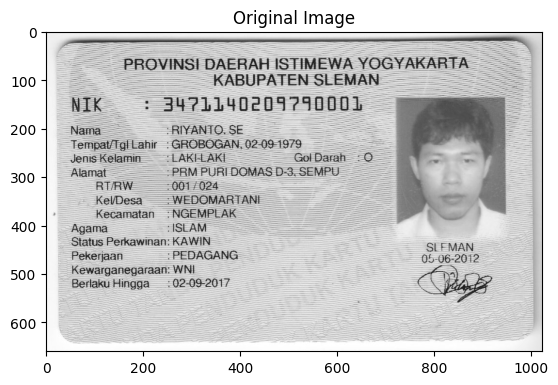

In [ ]:
# @title Load image ktp riyanto

img_ktp = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/ktp_riyanto.jpg', 0)

plt.imshow(img_ktp, cmap='gray')
plt.title('Original Image')

In [ ]:
# @title Function untuk otsu thresholding

def otsu_threshold(img):
    # Menghitung histogram
    hist, _ = np.histogram(img.flatten(), bins=256, range=[0, 256])
    total_pixels = img.size

    # Inisialisasi variabel
    sum_total = np.sum(np.arange(256) * hist)
    sum_background = 0
    weight_background = 0
    weight_foreground = 0

    max_variance = 0
    threshold = 0

    for i in range(256):
        weight_background += hist[i]  # Update weight background
        if weight_background == 0:
            continue

        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        sum_background += i * hist[i]
        mean_background = sum_background / weight_background
        mean_foreground = (sum_total - sum_background) / weight_foreground

        # Hitung varians antar kelas
        variance_between = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Update ambang batas jika varians lebih besar dari yang sebelumnya
        if variance_between > max_variance:
            max_variance = variance_between
            threshold = i

    return binary_threshold(img, threshold), threshold

Text(0.5, 1.0, 'Binary Threshold')

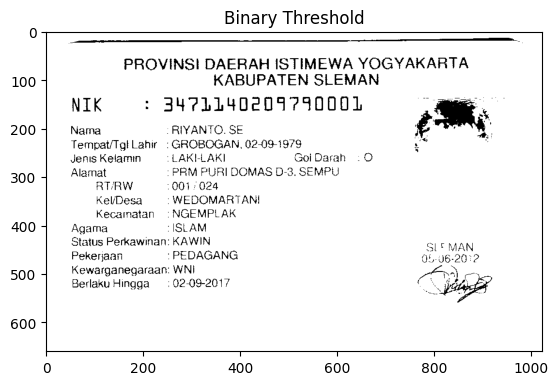

In [ ]:
# @title Melakukan global thresholding binary dengan v 90

img_ktp_binary = binary_threshold(img_ktp, 90)

plt.imshow(img_ktp_binary, cmap='gray')
plt.title('Binary Threshold')

Text(0.5, 1.0, 'Otsu Threshold: 155')

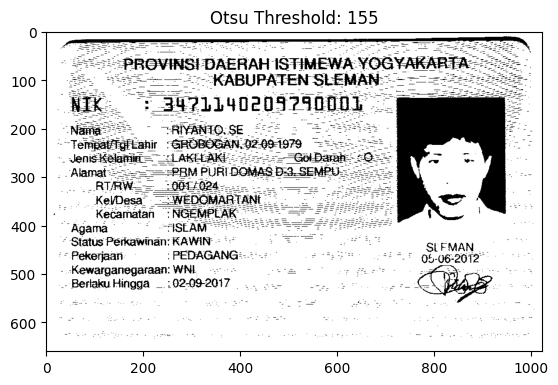

In [ ]:
# @title Melakukan otsu thresholding dengan v 167

img_ktp_otsu, threshold = otsu_threshold(img_ktp)

plt.imshow(img_ktp_otsu, cmap='gray')
plt.title(f'Otsu Threshold: {threshold}')

Text(0.5, 1.0, 'Otsu Threshold: 155')

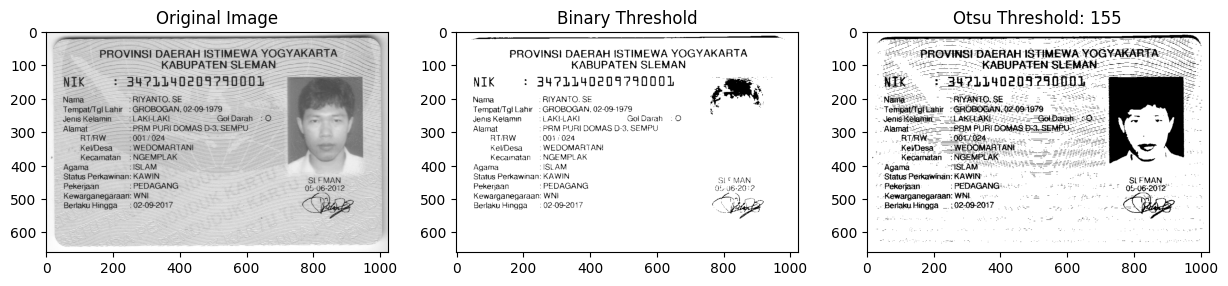

In [ ]:
# @title Menampilkan keseluruhan image dari binary threshold dan otsu

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(img_ktp, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(img_ktp_binary, cmap='gray')
ax[1].set_title('Binary Threshold')

ax[2].imshow(img_ktp_otsu, cmap='gray')
ax[2].set_title(f'Otsu Threshold: {threshold}')

In [ ]:
# @title Function untuk melakukan citra segmentation dan menampilkan hasil citra segmentation

def citra_segmentation(img, threshold):
  # convert grayscale
  img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

  # convert ke binary untuk mendapatkan nilai mask
  _, mask = cv.threshold(img_gray, threshold, 255, cv.THRESH_BINARY_INV)

  # Menghitung histogram untuk keseluruhan citra
  hist_full_red = cv.calcHist([img], [0], None, [256], [0, 256])
  hist_full_green = cv.calcHist([img], [1], None, [256], [0, 256])
  hist_full_blue = cv.calcHist([img], [2], None, [256], [0, 256])

  # Menghitung histogram hanya untuk foreground
  hist_fg_red = cv.calcHist([img], [0], mask, [256], [0, 256])
  hist_fg_green = cv.calcHist([img], [1], mask, [256], [0, 256])
  hist_fg_blue = cv.calcHist([img], [2], mask, [256], [0, 256])

  # Plot gambar asli dan citra segmentasi
  plt.figure(figsize=(10, 8))

  # Menampilkan gambar asli
  plt.subplot(2, 2, 1)
  plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  plt.title("Citra Asli")
  plt.axis("off")

  # Menampilkan gambar segmentasi (mask)
  plt.subplot(2, 2, 2)
  plt.imshow(mask, cmap="gray")
  plt.title("Citra Segment")
  plt.axis("off")

  # Menampilkan histogram keseluruhan citra
  plt.subplot(2, 2, 3)
  plt.plot(hist_full_red, color="r", label="Red")
  plt.plot(hist_full_green, color="g", label="Green")
  plt.plot(hist_full_blue, color="b", label="Blue")
  plt.title("Histogram dari keseluruhan citra")
  plt.xlabel("Intensity Value")
  plt.ylabel("Pixel Count")
  plt.legend()

  # Menampilkan histogram hanya untuk foreground
  plt.subplot(2, 2, 4)
  plt.plot(hist_fg_red, color="r", label="Red")
  plt.plot(hist_fg_green, color="g", label="Green")
  plt.plot(hist_fg_blue, color="b", label="Blue")
  plt.title("Histogram hanya pada FG objek saja")
  plt.xlabel("Intensity Value")
  plt.ylabel("Pixel Count")
  plt.legend()

  plt.tight_layout()
  plt.show()

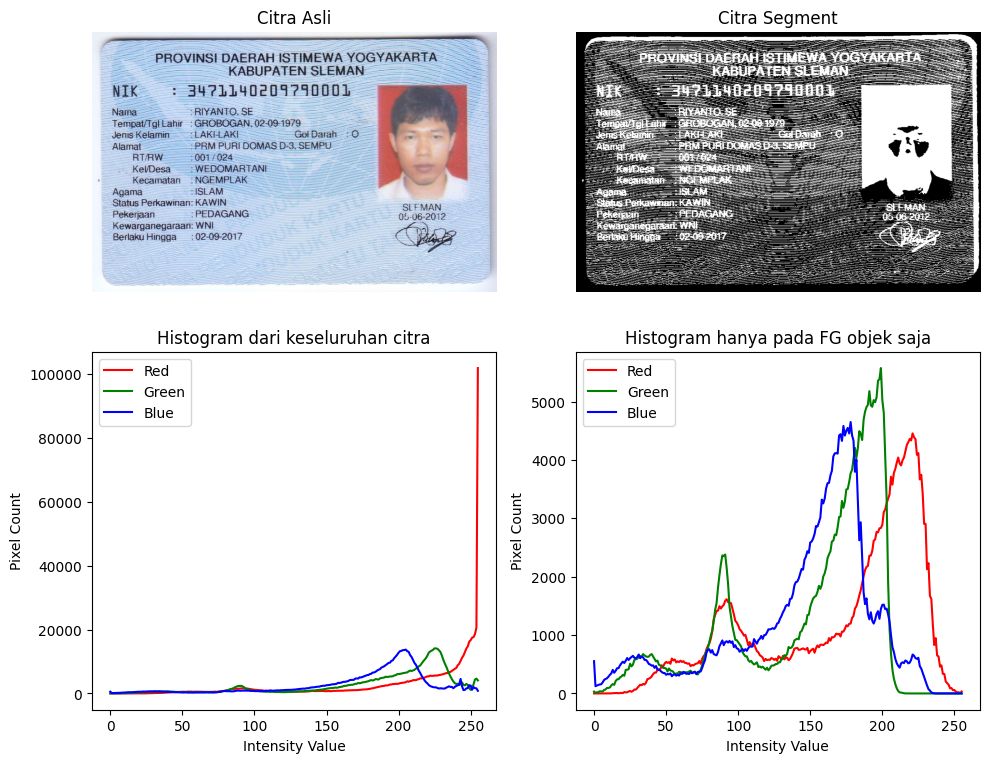

In [ ]:
# @title Melakukan citra segmentation

img_ktp_color = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/ktp_riyanto.jpg')

citra_segmentation(img_ktp_color, 200)

(<Axes: >, <matplotlib.image.AxesImage at 0x7b5b2d336230>)

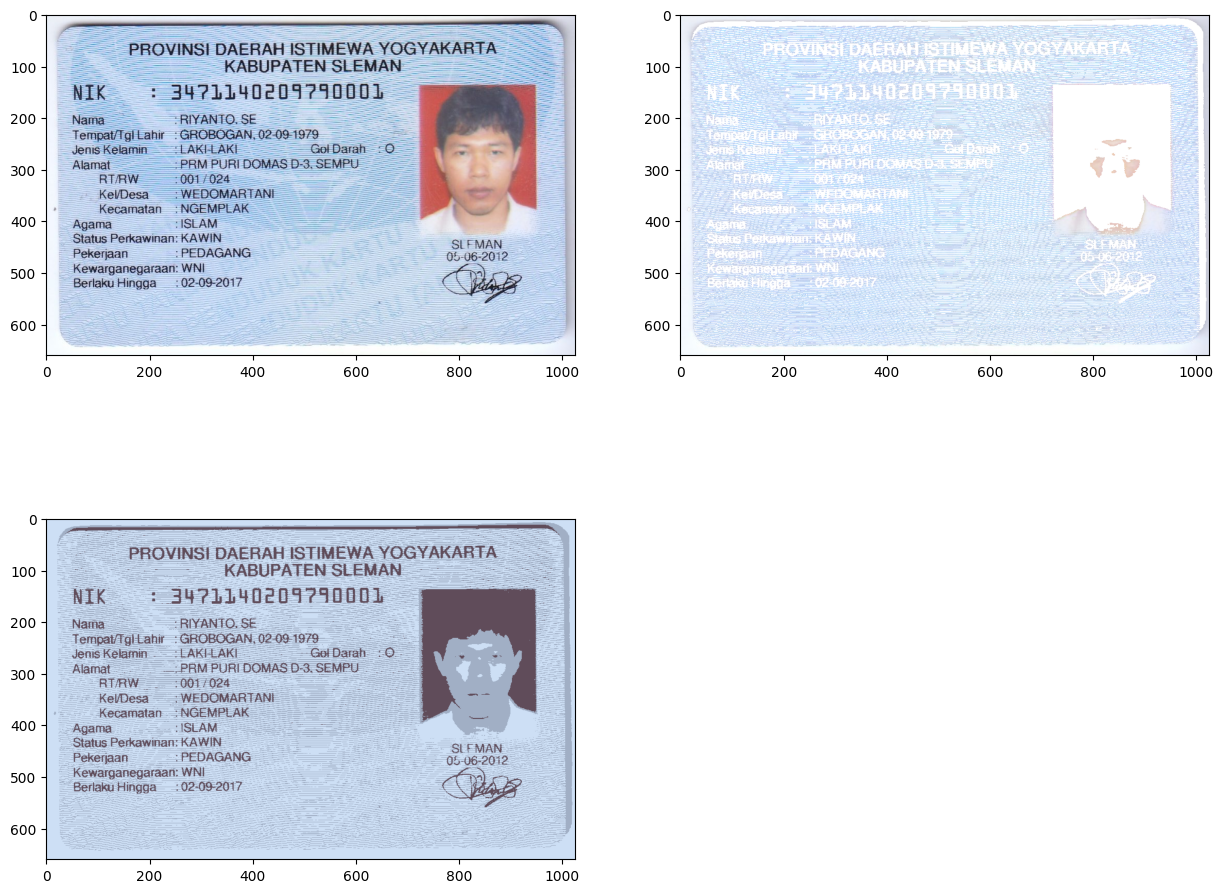

In [ ]:
img = cv.cvtColor(img_ktp_color,cv.COLOR_BGR2RGB)

#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)

k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None,
criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)
plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)

In [ ]:
# @title Melakukan instalasi pip ocr

!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ind
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 537 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 537 kB in 1s (461 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-ind.
(Reading databa

In [ ]:
# @title Melakukan penambahan axis ke dalam objek dengan method subplot

def display(img):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

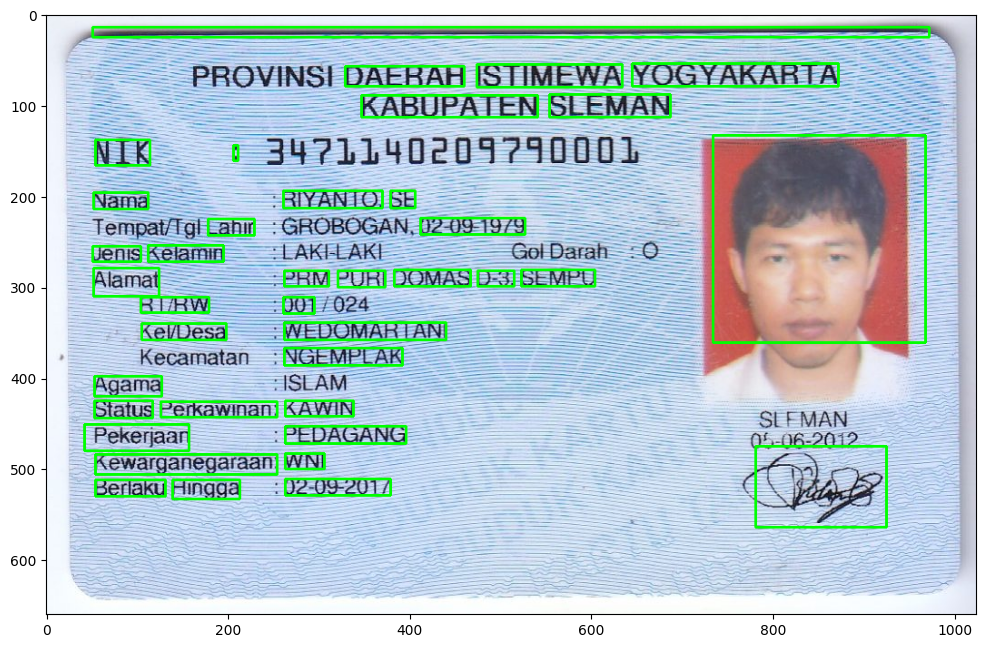

In [ ]:
from pytesseract import Output

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pyt.image_to_data(threshed,output_type='data.frame')

n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv.rectangle(img, (x, y), (x + w, y + h), (0,255, 0), 2)
display(img)

 

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

NIK : 34?2140209?900D01 Sk,
Nama RIYANTO. SE £ PA
Tempat/Tgl Lahir : GROBOGAN. 02-09-1979 “ "
Jenis Kelamin LAKI-LAKI GolDarah - 0 "
Alamat PRM PURI DOMAS D-3. SEMPU

RT/RW 001 1024

Kel/Desa WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama :ISLAM

Status Perkawinan: KAWIN ENY
Pekerjaan : PEDAGANG 08 6.20 »
Kewarganegaraan: WNI N

Berlaku Hingga 02-09-2017

 



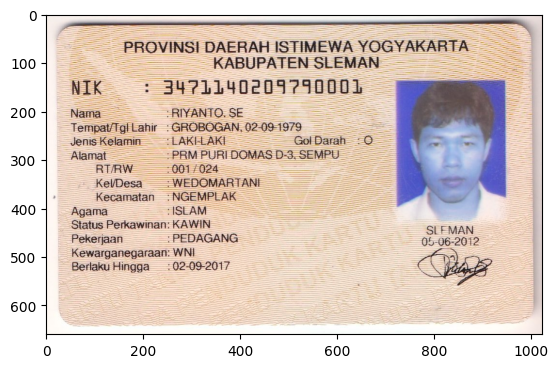

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/ktp_riyanto.jpg')
plt.imshow(img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pyt.image_to_data(threshed,output_type='data.frame')
text2 = pyt.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()